In [1]:
library(Giotto)

In [2]:
expr_path = system.file("extdata", "visium_DG_expr.txt", package = 'Giotto')
loc_path = system.file("extdata", "visium_DG_locs.txt", package = 'Giotto')
my_visium_object <- createGiottoObject(raw_exprs = expr_path,
                                  spatial_locs = loc_path)

Consider to install these (optional) packages to run all possible Giotto commands:  tiff biomaRt trendsceek multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies
 no external python path was provided, but a giotto python environment was found and will be used 


In [3]:
# read image
png_path = system.file("extdata", "deg_image.png", package = 'Giotto')
mg_img = magick::image_read(png_path)

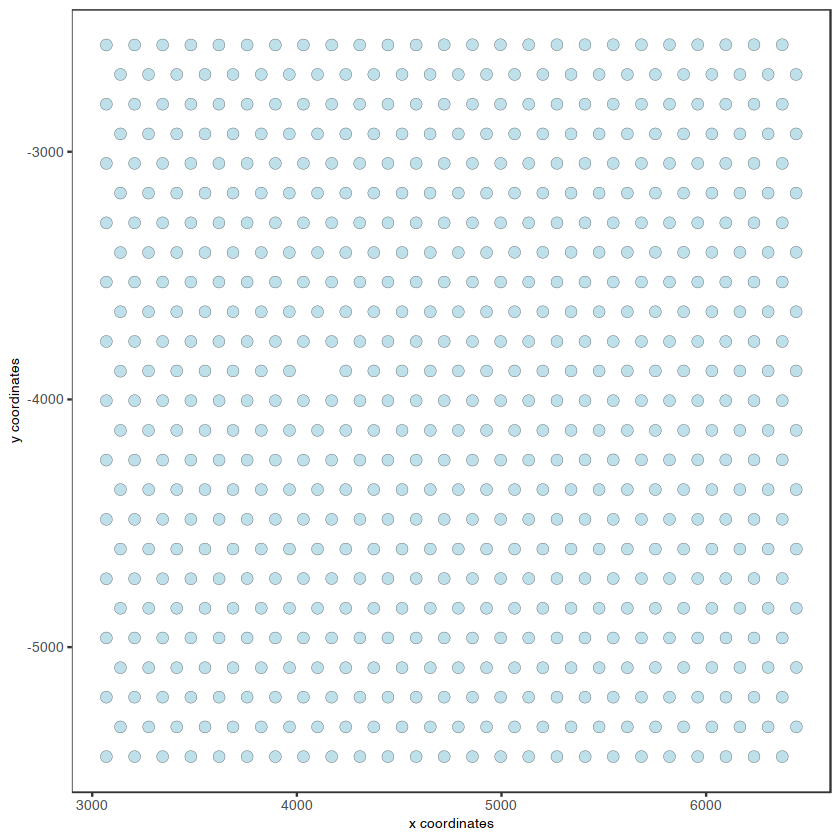

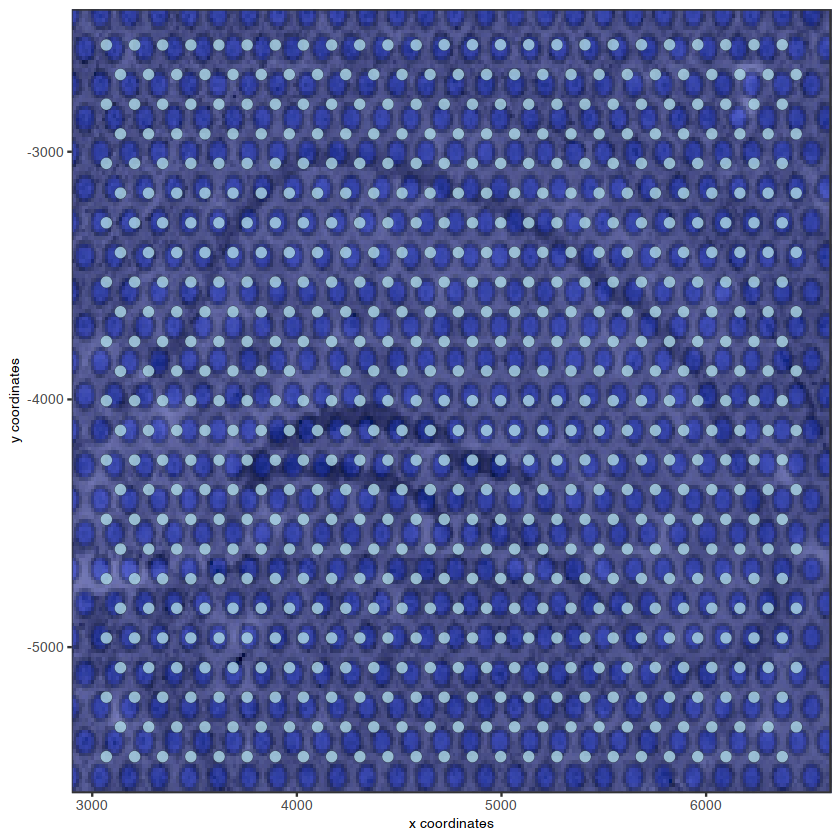

In [4]:
# test and modify image alignment
mypl = spatPlot(my_visium_object, return_plot = T, point_alpha = 0.8)
orig_png = createGiottoImage(gobject = my_visium_object, mg_object = mg_img, name = 'image',
                             xmax_adj = 450, xmin_adj = 550,
                             ymax_adj = 200, ymin_adj = 200)
mypl_image = addGiottoImageToSpatPlot(mypl, orig_png)
mypl_image


In [5]:
# add image to Giotto object

image_list = list(orig_png)
my_visium_object = addGiottoImage(gobject = my_visium_object,
                             images = image_list)
showGiottoImageNames(my_visium_object)

The following images are available:  image 


[1] "image"

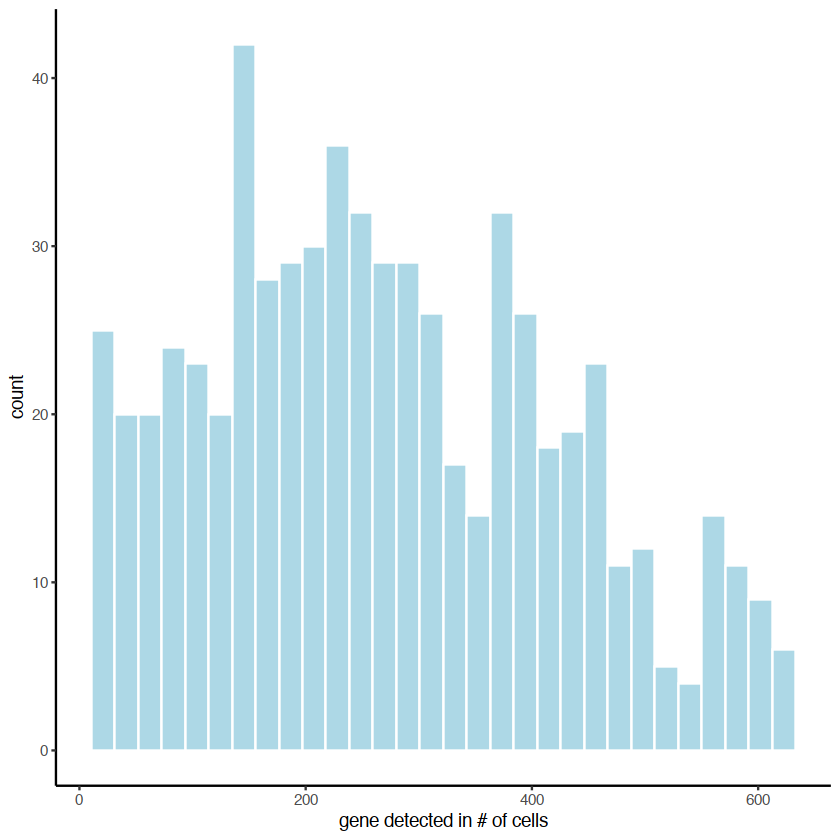

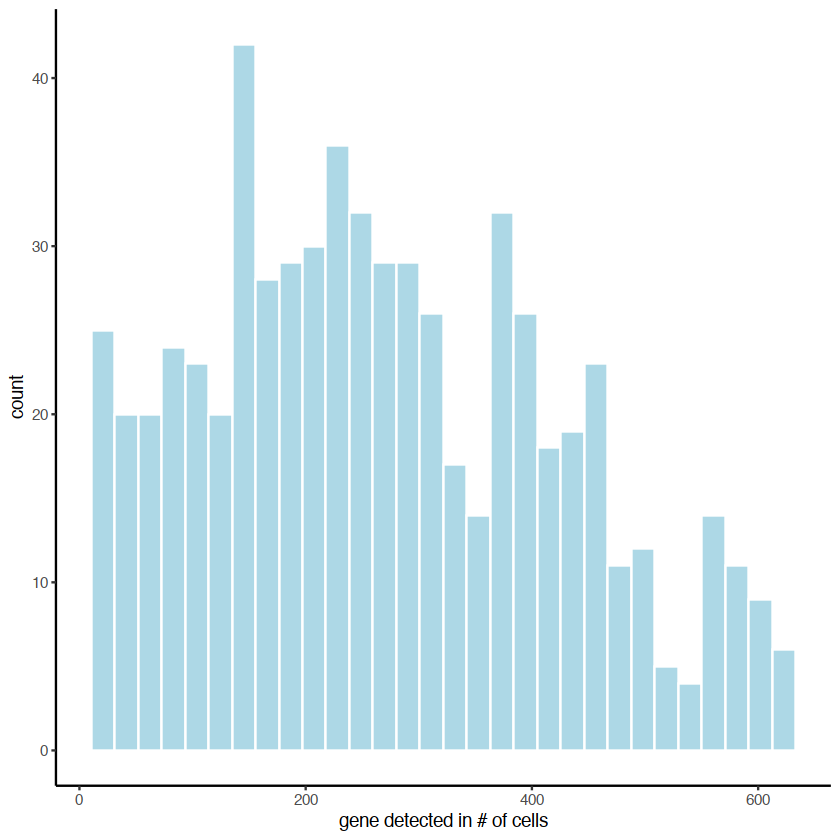

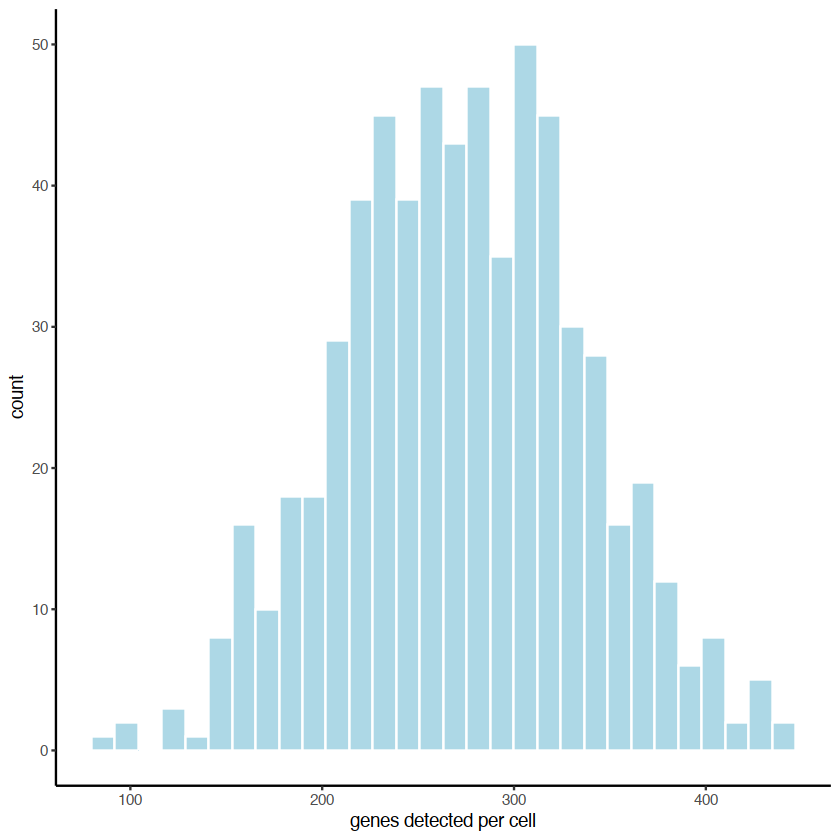

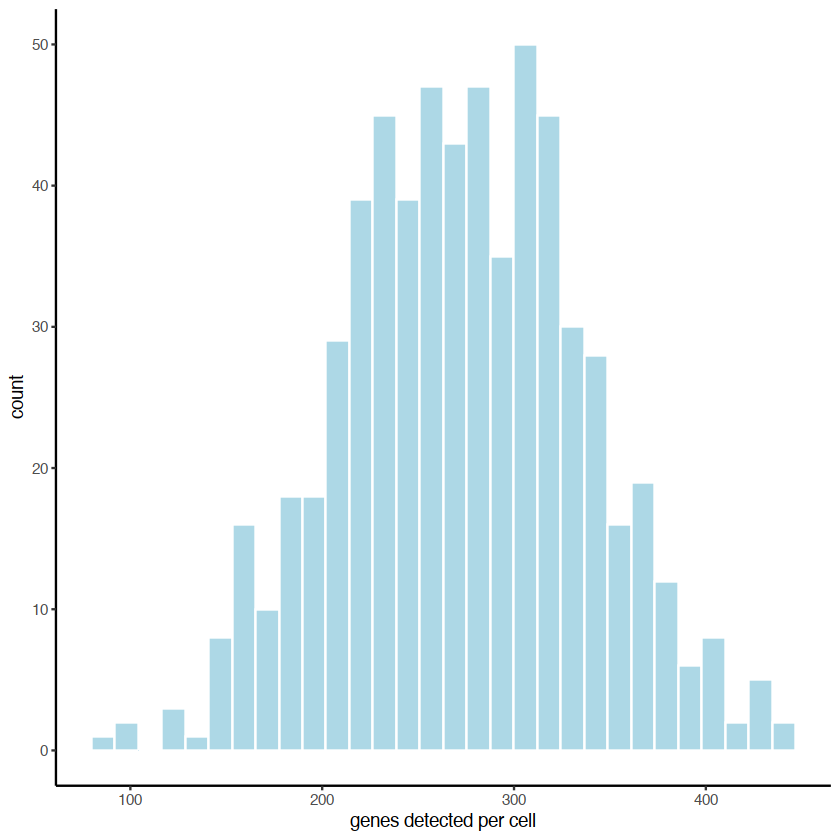

$results
   threshold gene_detected_in_min_cells min_detected_genes_per_cell combination
1:         1                         20                         100      20-100
2:         1                         20                         200      20-200
3:         1                         50                         100      50-100
4:         1                         50                         200      50-200
   removed_genes removed_cells
1:             1             2
2:             1            75
3:            43             2
4:            43            77

$ggplot


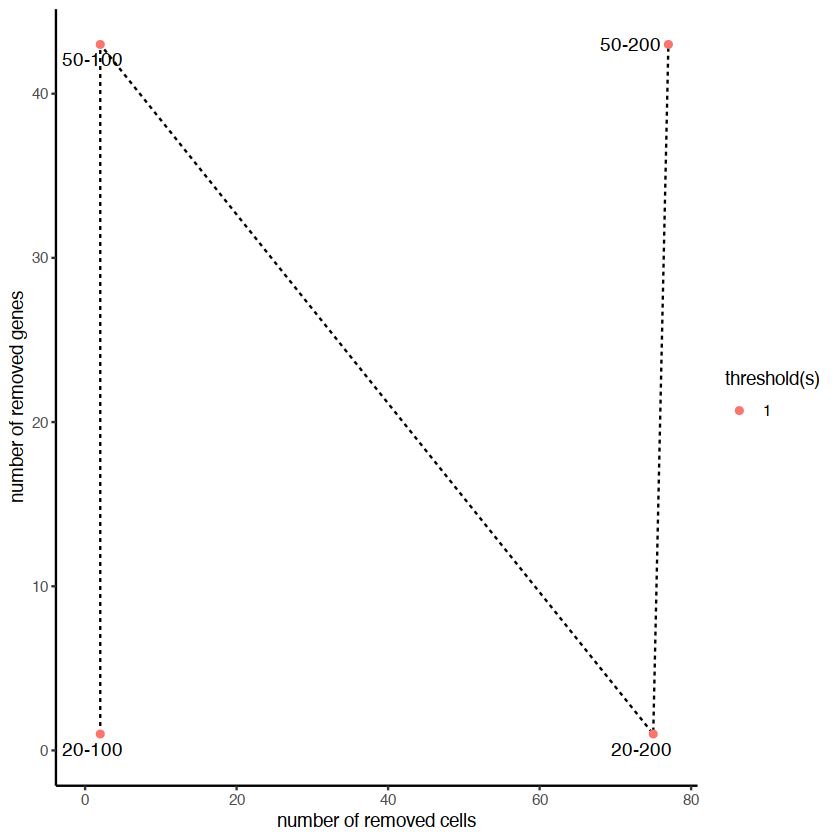

Number of cells removed:  2  out of  624 
Number of genes removed:  43  out of  634 

 first scale genes and then cells 


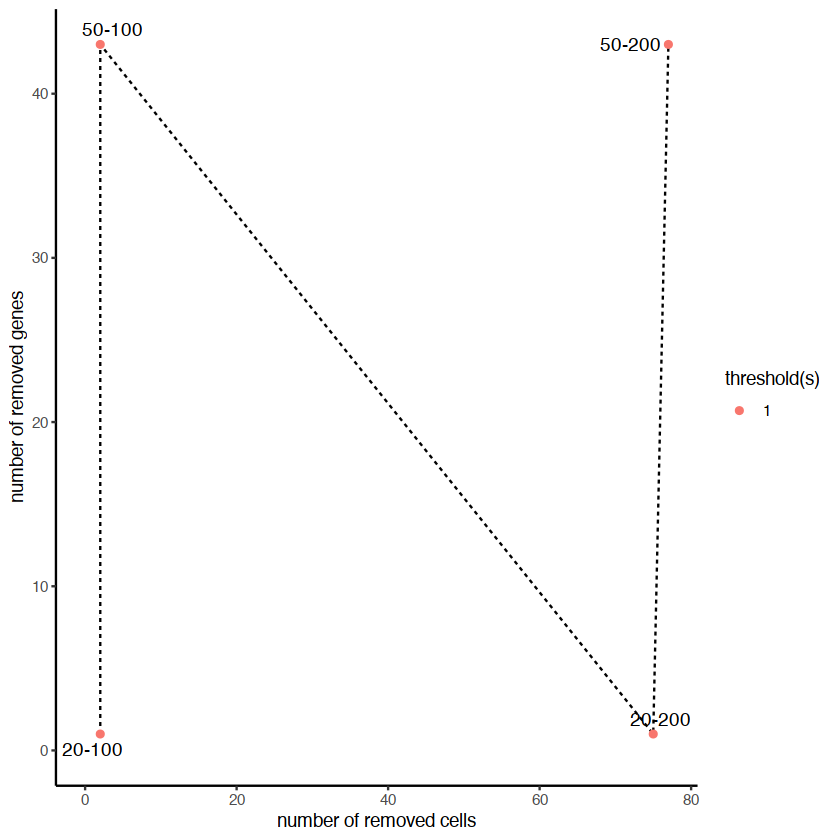

In [6]:
# explore gene and cell distribution
filterDistributions(my_visium_object, detection = 'genes')
filterDistributions(my_visium_object, detection = 'cells')
filterCombinations(my_visium_object,
                   expression_thresholds = c(1),
                   gene_det_in_min_cells = c(20, 20, 50, 50),
                   min_det_genes_per_cell = c(100, 200, 100, 200))

# filter and normalize
my_visium_object <- filterGiotto(gobject = my_visium_object,
                            expression_threshold = 1,
                            gene_det_in_min_cells = 50,
                            min_det_genes_per_cell = 100,
                            expression_values = c('raw'),
                            verbose = T)
my_visium_object <- normalizeGiotto(gobject = my_visium_object, scalefactor = 6000, verbose = T)
my_visium_object <- addStatistics(gobject = my_visium_object)

return_plot = TRUE and return_gobject = TRUE 

          plot will not be returned to object, but can still be saved with save_plot = TRUE or manually 
hvg  was found in the gene metadata information and will be used to select highly variable genes 


Warning message in runPCA_prcomp_irlba(x = t_giotto(expr_values), center = center, :
“ncp >= minimum dimension of x, will be set to minimum dimension of x - 1”
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“did not converge--results might be invalid!; try increasing work or maxit”


PCA with name:  pca  already exists and will be used for the screeplot 


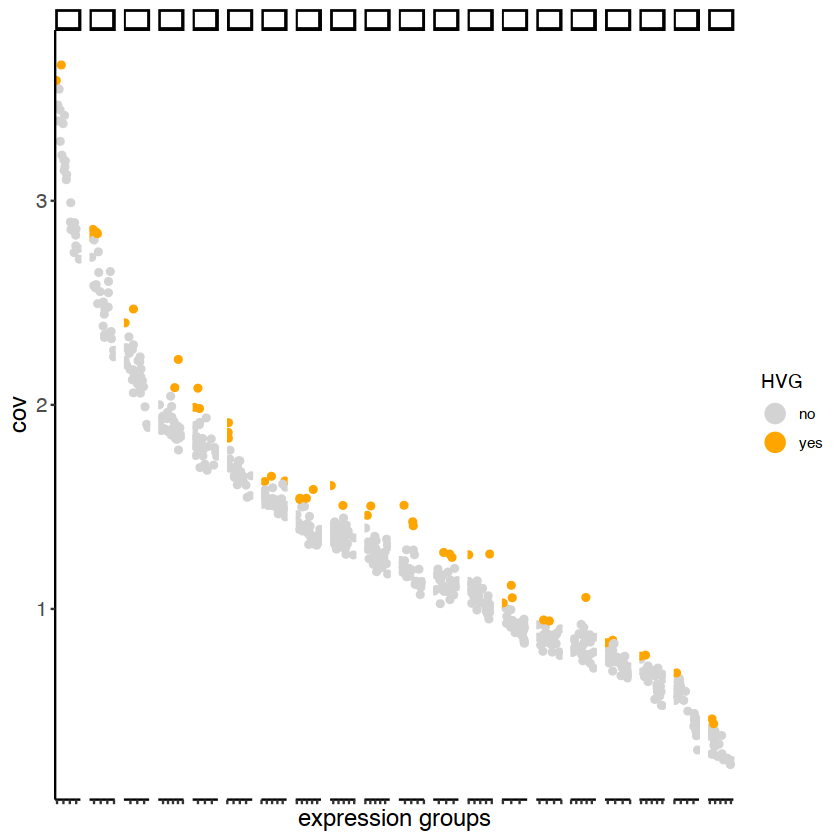

named list()

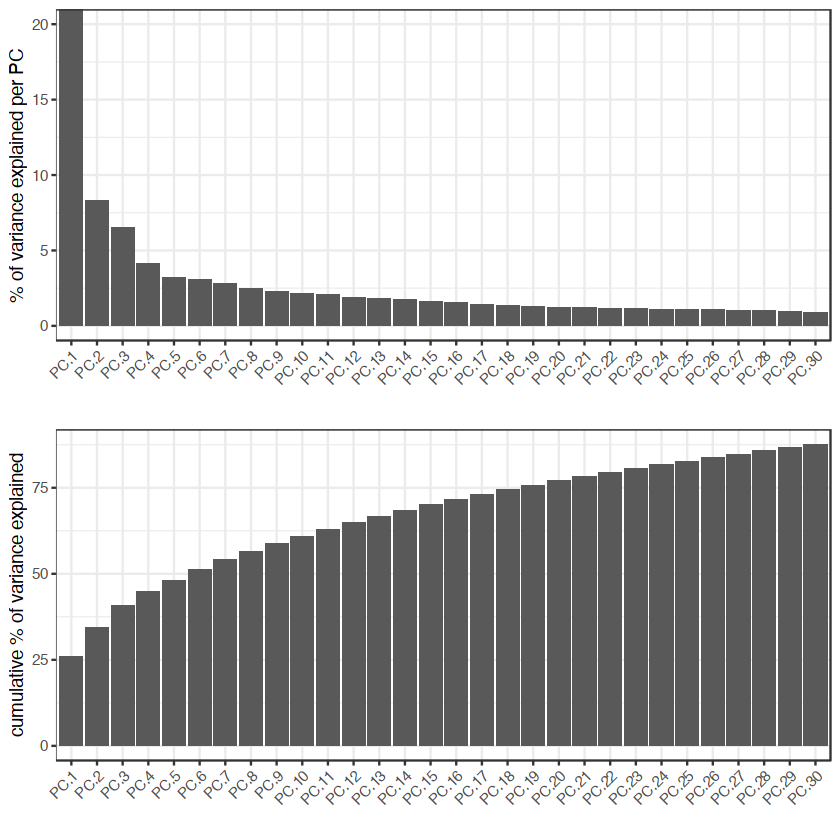

named list()

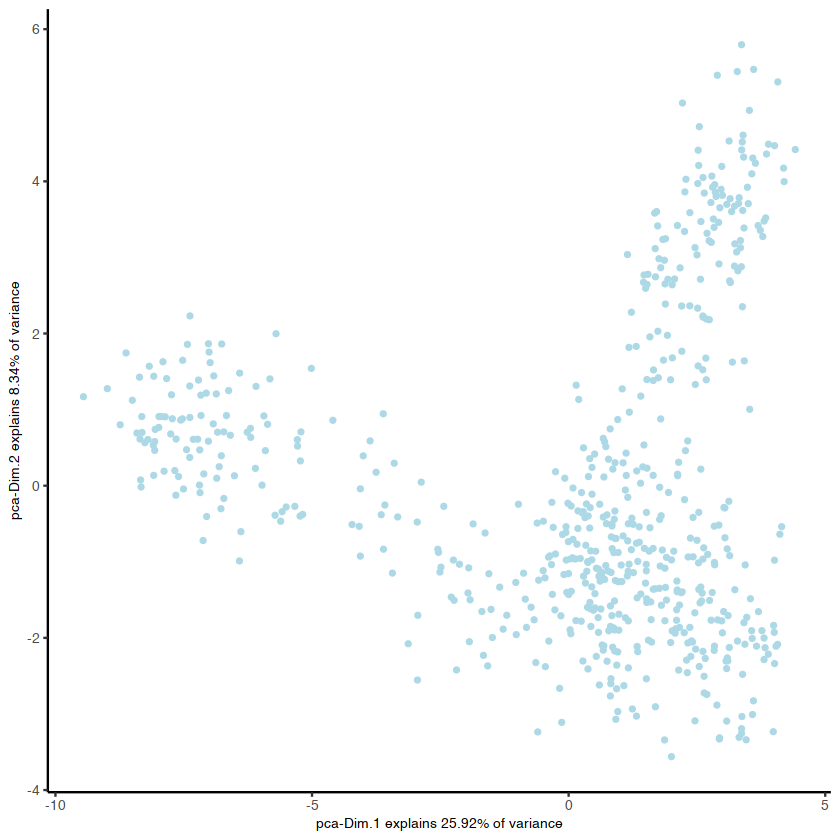

named list()

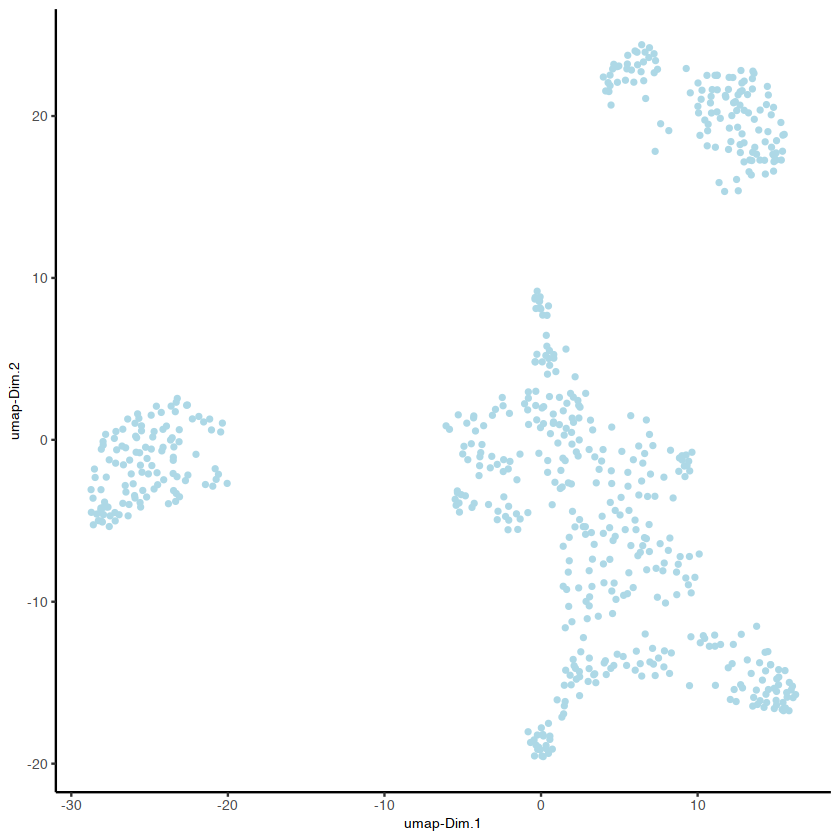

named list()

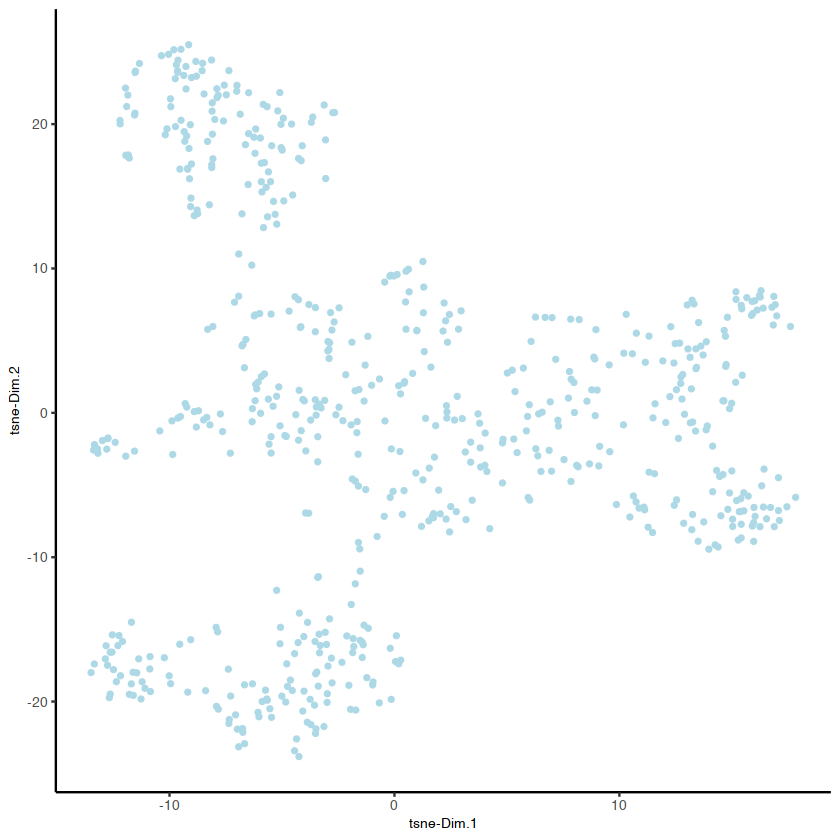

In [7]:
my_visium_object <- calculateHVG(gobject = my_visium_object)

my_visium_object <- runPCA(gobject = my_visium_object)
screePlot(my_visium_object, ncp = 30)[0]
plotPCA(gobject = my_visium_object)[0]

my_visium_object <- runUMAP(my_visium_object, dimensions_to_use = 1:10)
plotUMAP(gobject = my_visium_object)[0]
my_visium_object <- runtSNE(my_visium_object, dimensions_to_use = 1:10)
plotTSNE(gobject = my_visium_object)[0]

cell_ID            nr_genes perc_genes total_expr leiden_clus
1   AAAGGGATGTAGCAAG-1 226      38.24027    992.0223  1          
2   AAATGGCATGTCTTGT-1 283      47.88494   1123.8751  2          
3   AAATGGTCAATGTGCC-1 247      41.79357   1024.8760  3          
4   AAATTAACGGGTAGCT-1 221      37.39425    971.3199  3          
5   AACAACTGGTAGTTGC-1 306      51.77665   1157.2925  3          
6   AACAGGAAATCGAATA-1 337      57.02200   1227.8457  2          
7   AACAGGATGGGCCGCG-1 345      58.37563   1270.2856  3          
8   AACCATGGGATCGCTA-1 245      41.45516    906.7252  1          
9   AACCCAGAGACGGAGA-1 209      35.36379    944.9298  1          
10  AACCGAGCTTGGTCAT-1 234      39.59391   1002.0938  1          
11  AACCGTTGTGTTTGCT-1 250      42.30118   1020.3441  2          
12  AACGATAGAAGGGCCG-1 262      44.33164    972.3593  1          
13  AACGATATGTCAACTG-1 307      51.94585   1091.5112  1          
14  AACGCGGTCTCCAGCC-1 340      57.52961   1084.5768  5          
15  AACGTCAGACTAGTGG-1 425      71.91201   1262.9168  4          
16  AACTCGATGGCGCAGT-1 263      44.50085   1052.5321  2          
17  AACTGATATTAGGCCT-1 251      42.47039   1044.1316  2          
18  AACTGGGTCCCGACGT-1 272      46.02369   1065.5888  1          
19  AACTTGCCCGTATGCA-1 327      55.32995   1016.3625  1          
20  AAGAGATGAATCGGTA-1 397      67.17428   1073.1927  1          
21  AAGCTCGTGCCAAGTC-1 194      32.82572    753.4470  1          
22  AAGGAGCGGTTGGTGC-1 372      62.94416   1219.8311  3          
23  AAGGCGCGTAAAGCTT-1 379      64.12860   1149.7145  4          
24  AAGGCTGTGCTCATCG-1 256      43.31641   1066.2885  3          
25  AAGTAGAAGACCGGGT-1 163      27.58037    808.2545  1          
26  AAGTAGTGACGCGAGG-1 261      44.16244   1050.1899  3          
27  AATCCAAGGGCCTGAG-1 319      53.97631   1172.2522  2          
28  AATGACTGTCAGCCGG-1 220      37.22504    988.9873  4          
29  AATGCAACCGGGTACC-1 248      41.96277   1074.7868  1          
30  AATGGTTCTCACAAGC-1 155      26.22673    789.5700  1          
⋮   ⋮                  ⋮        ⋮          ⋮          ⋮          
593 TTCAAAGTCTCTAGCC-1 368      62.26734    887.5301  1          
594 TTCAACGACCCGACCG-1 189      31.97970    890.8466  1          
595 TTCAAGCCGAGCTGAG-1 279      47.20812   1098.4488  2          
596 TTCATGGCGCAACAGG-1 298      50.42301   1089.9550  2          
597 TTCCTCGAGGGTGTCT-1 261      44.16244   1052.4269  1          
598 TTCGACGGGAAGGGCG-1 402      68.02030   1220.8861  4          
599 TTCGCACTCGCGTGCT-1 386      65.31303   1336.0395  4          
600 TTCGTACTCCAGAACG-1 296      50.08460   1146.6581  3          
601 TTCTACTTGCGAGGGC-1 152      25.71912    785.7827  1          
602 TTCTAGGCCAATTGTG-1 125      21.15059    521.5715  1          
603 TTCTTAGTGAACGGTG-1 286      48.39255    941.1895  5          
604 TTCTTAGTGGCTCAGA-1 357      60.40609   1186.1398  1          
605 TTCTTGTAACCTAATG-1 103      17.42809    592.8291  1          
606 TTGAAGAATTCCCAGG-1 285      48.22335   1108.5016  3          
607 TTGAATATGGACTTTC-1 371      62.77496    896.1560  1          
608 TTGATCTAACTTTGTC-1 271      45.85448    938.2142  3          
609 TTGATTATGCAGATGA-1 177      29.94924    801.6968  1          
610 TTGCACGGAGCAGCAC-1 311      52.62267   1201.7754  5          
611 TTGCTCCCATACCGGA-1 329      55.66836   1079.5777  1          
612 TTGCTGAAGGAACCAC-1 351      59.39086   1082.9182  5          
613 TTGCTGATCATGTTCG-1 227      38.40948    985.3891  3          
614 TTGGATTGGGTACCAC-1 252      42.63959    877.3853  1          
615 TTGGCTCGCATGAGAC-1 188      31.81049    897.5541  1          
616 TTGGGACACTGCCCGC-1 363      61.42132   1113.8364  4          
617 TTGGGCGGCGGTTGCC-1 319      53.97631   1108.9337  1          
618 TTGTAATCCGTACTCG-1 313      52.96108   1179.7196  3          
619 TTGTATCACACAGAAT-1 240      40.60914    999.6419  2          
620 TTGTCGTTCAGTTACC-1 219      37.05584    991.4468  1          
621 TTGTGGCCCTGACAGT-1 202      34.17936    

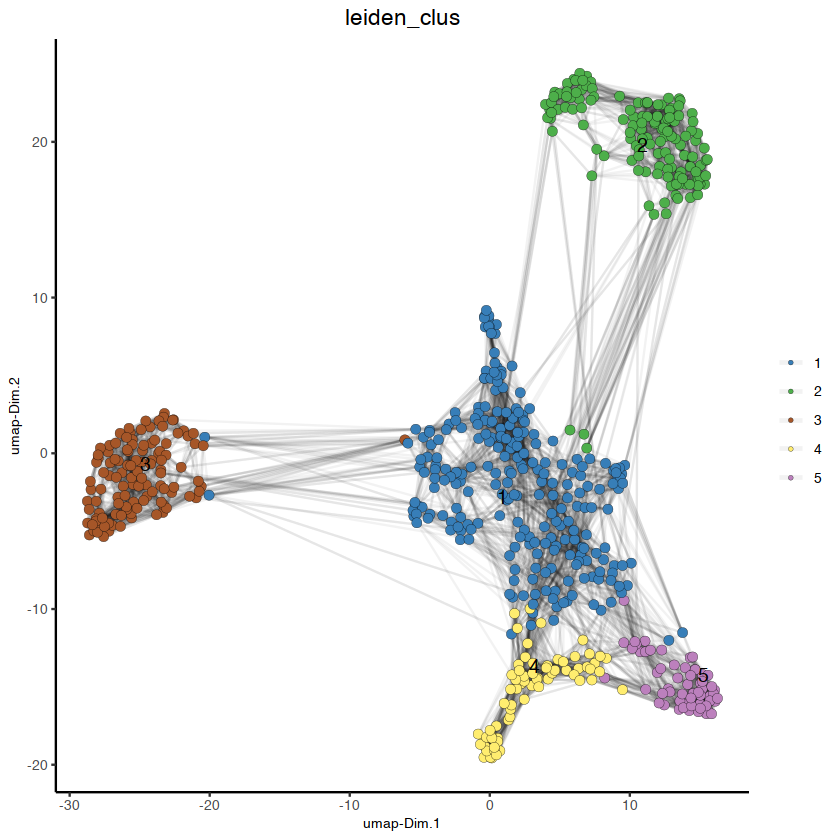

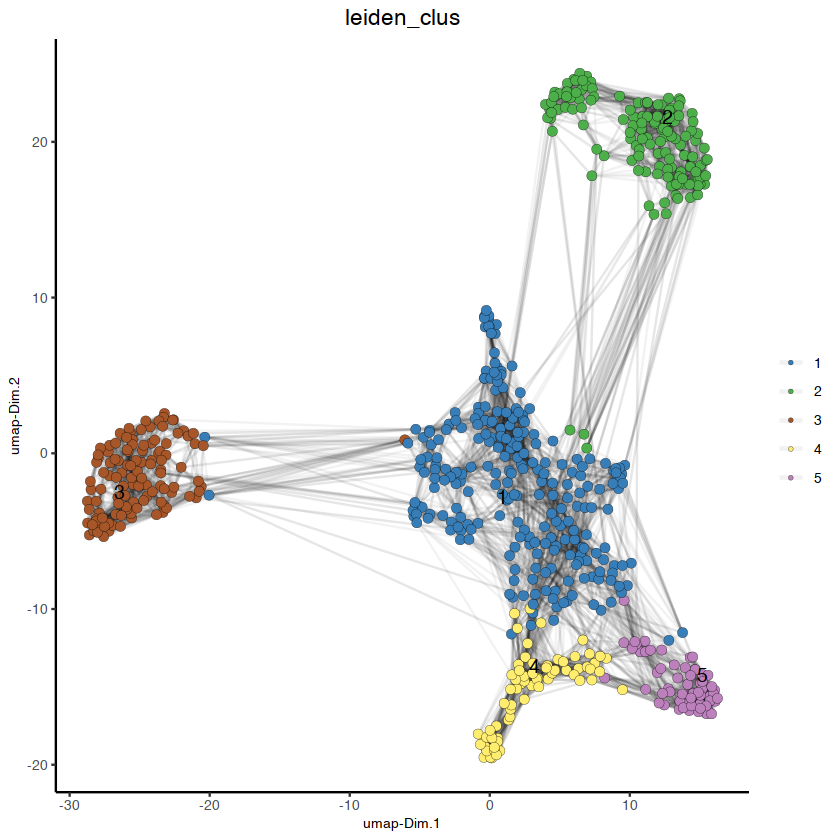

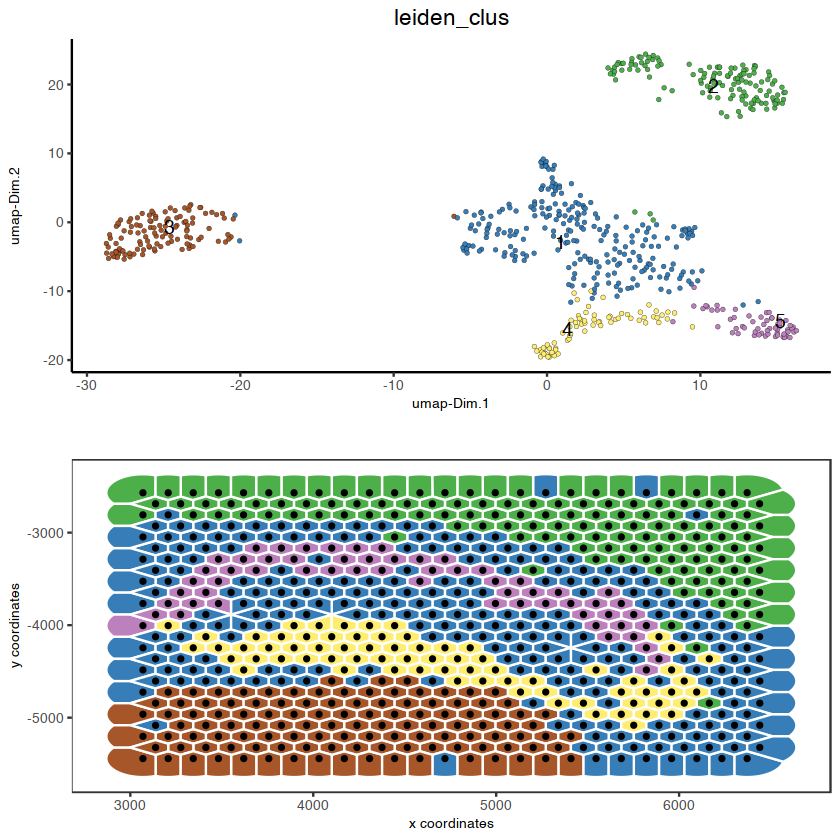

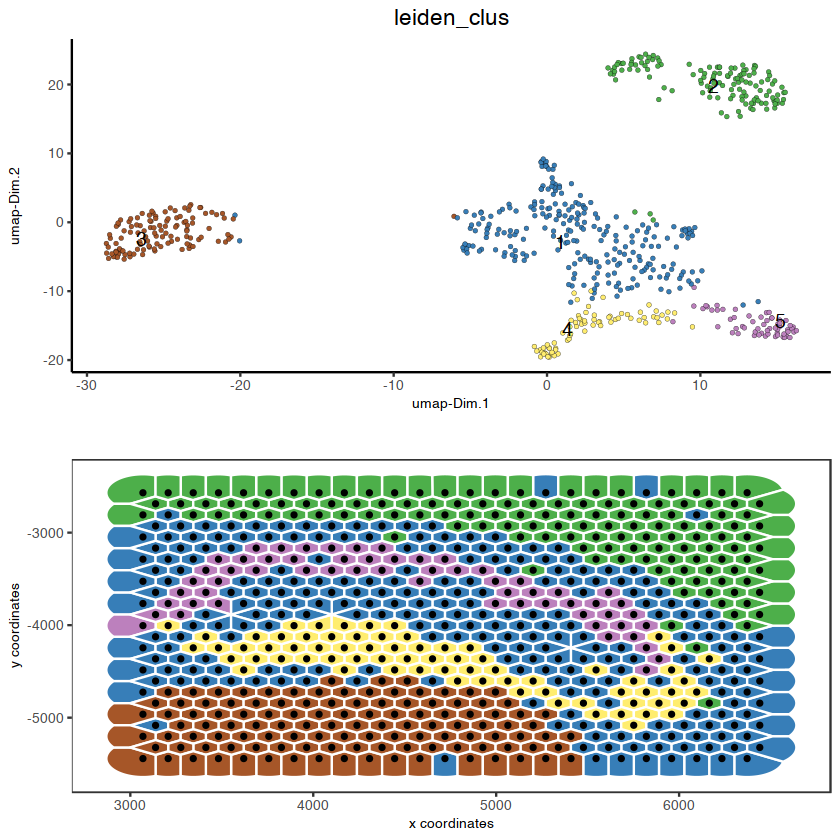

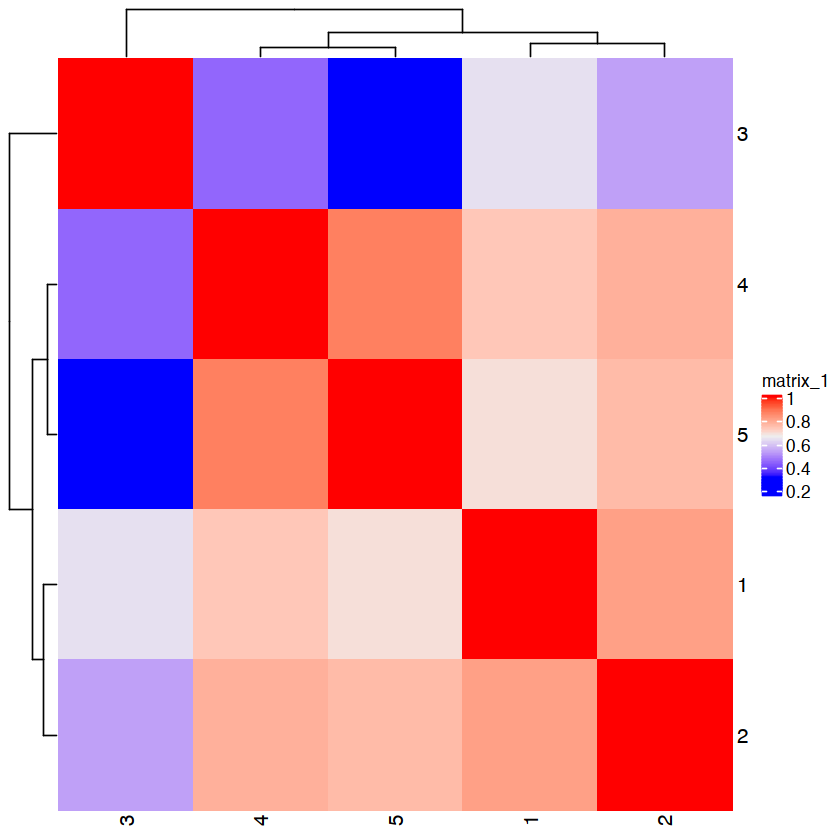

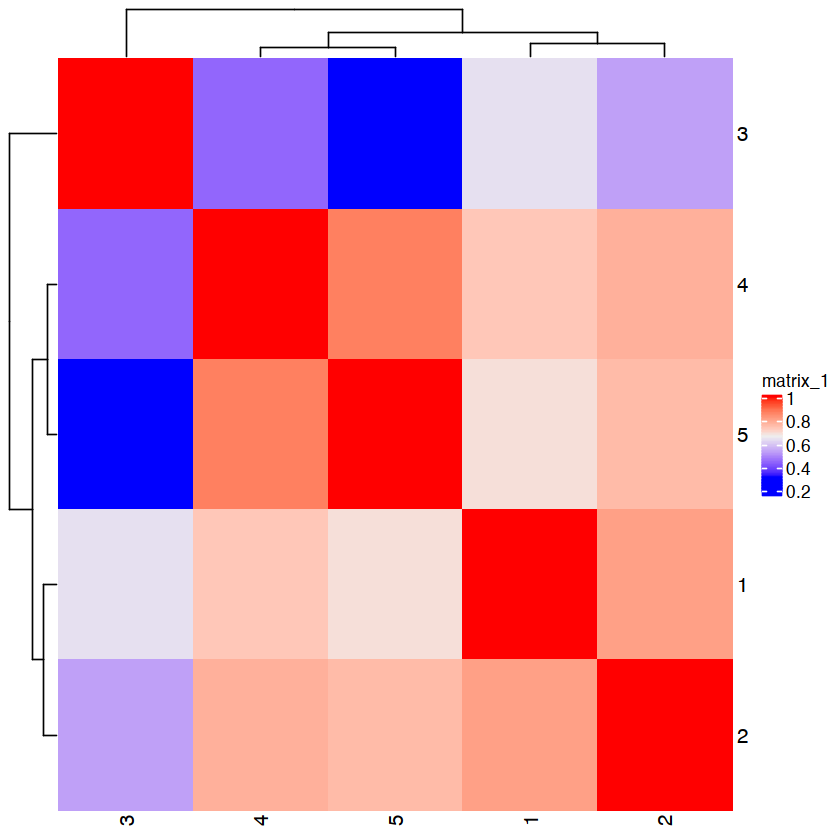

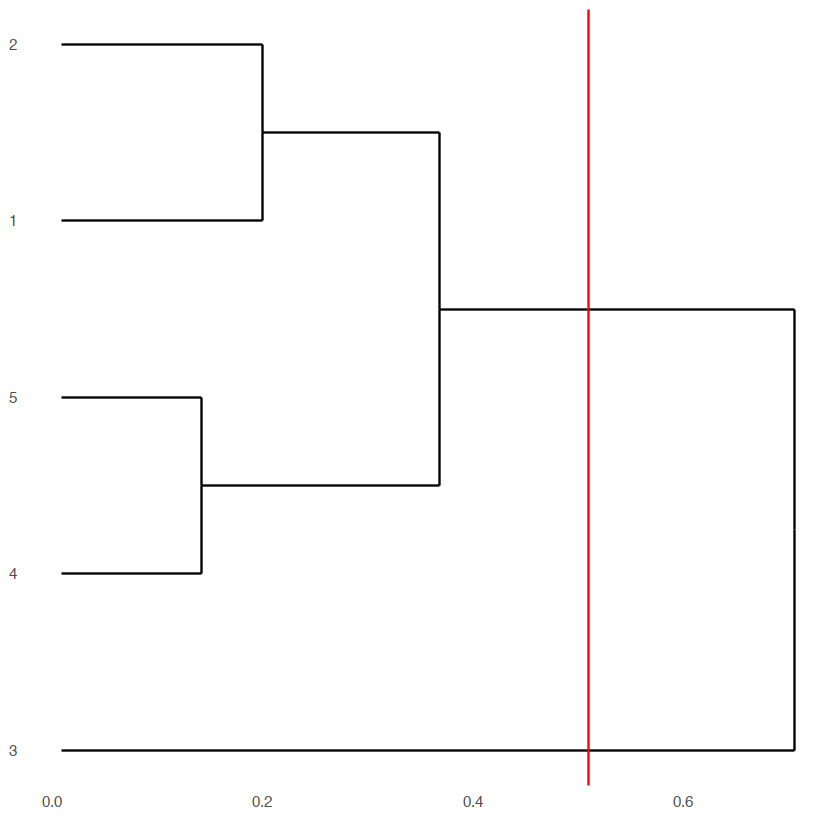

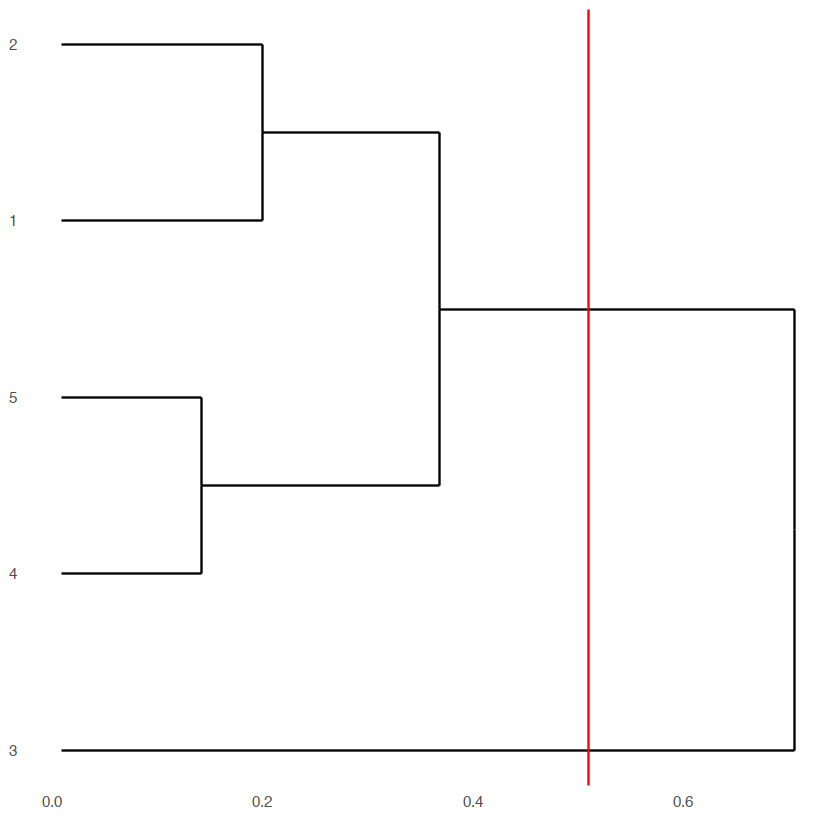

In [8]:
my_visium_object <- createNearestNetwork(gobject = my_visium_object, dimensions_to_use = 1:10, k = 20)
my_visium_object <- doLeidenCluster(gobject = my_visium_object, resolution = 0.4, n_iterations = 1000)

pDataDT(my_visium_object)

# visualize UMAP cluster results
plotUMAP(gobject = my_visium_object, cell_color = 'leiden_clus', show_NN_network = T, point_size = 2.5)

# visualize UMAP and spatial results
spatDimPlot(gobject = my_visium_object, cell_color = 'leiden_clus', spat_point_shape = 'voronoi')

# heatmap and dendrogram
showClusterHeatmap(gobject = my_visium_object, cluster_column = 'leiden_clus')
showClusterDendrogram(my_visium_object, h = 0.5, rotate = T, cluster_column = 'leiden_clus')

using 'Scran' to detect marker genes. If used in published research, please cite:
  Lun ATL, McCarthy DJ, Marioni JC (2016).
  'A step-by-step workflow for low-level analysis of single-cell RNA-seq data with Bioconductor.'
  F1000Res., 5, 2122. doi: 10.12688/f1000research.9501.2. 




 start with cluster  1 

 start with cluster  2 

 start with cluster  3 

 start with cluster  4 

 start with cluster  5 


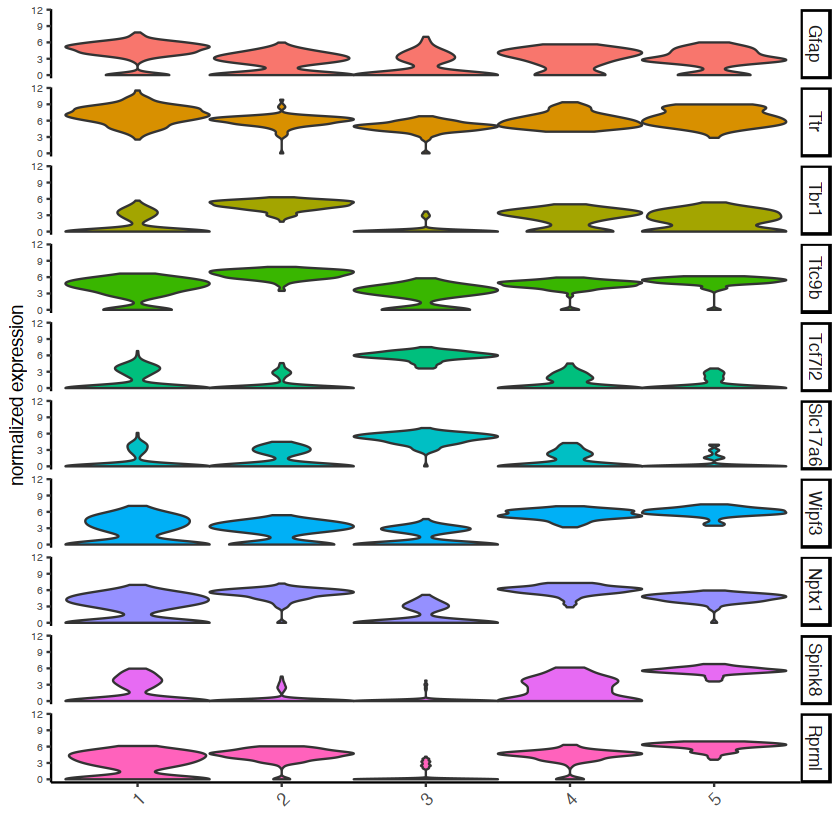

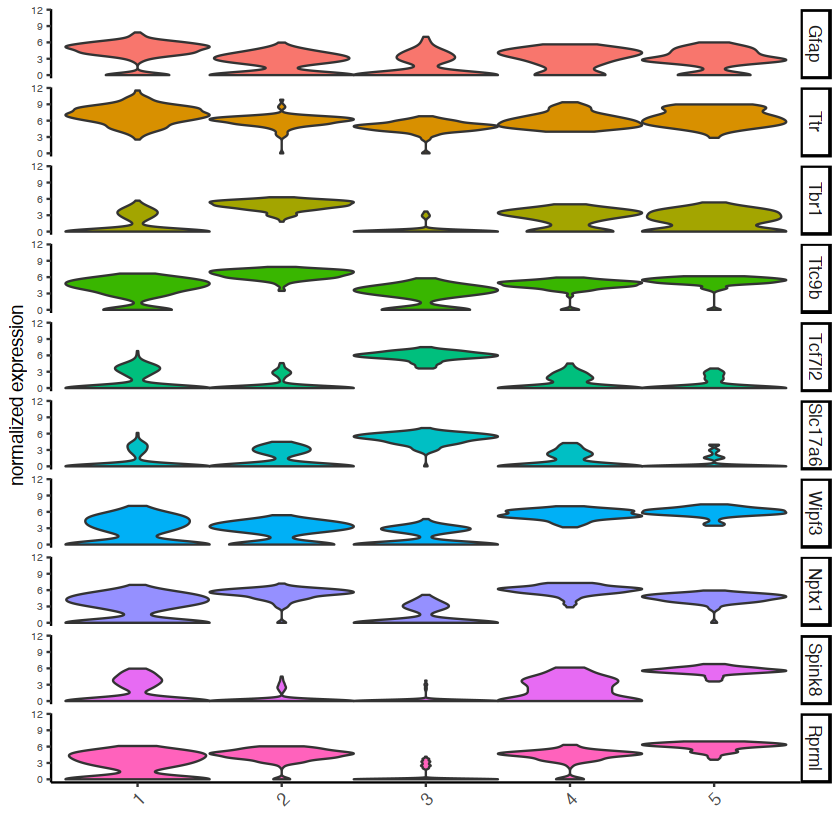

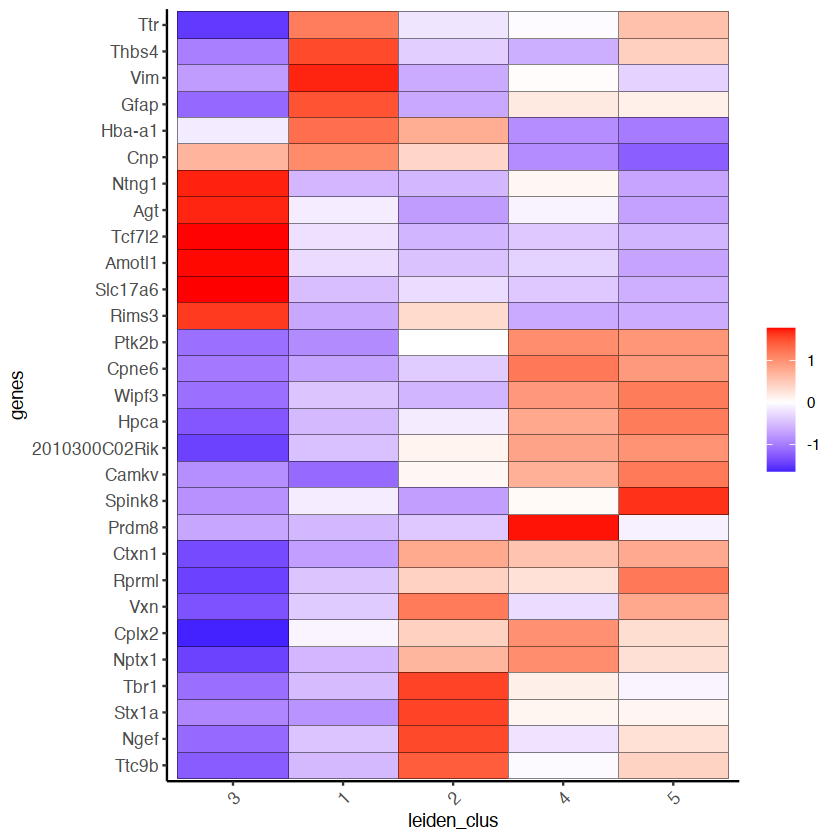

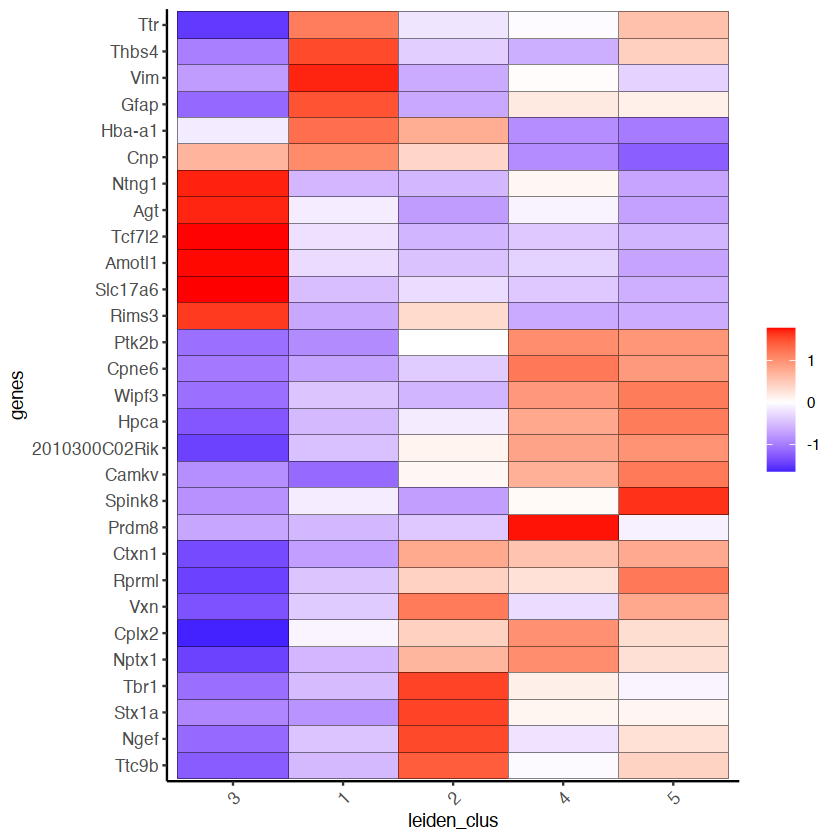

In [9]:
scran_markers = findMarkers_one_vs_all(gobject = my_visium_object,
                                       method = 'scran',
                                       expression_values = 'normalized',
                                       cluster_column = 'leiden_clus')
# violinplot
topgenes_scran = scran_markers[, head(.SD, 2), by = 'cluster']$genes
violinPlot(my_visium_object, genes = topgenes_scran, cluster_column = 'leiden_clus',
           strip_text = 10, strip_position = 'right')

# metadata heatmap
topgenes_scran = scran_markers[, head(.SD, 6), by = 'cluster']$genes
plotMetaDataHeatmap(my_visium_object, selected_genes = topgenes_scran,
                    metadata_cols = c('leiden_clus'))

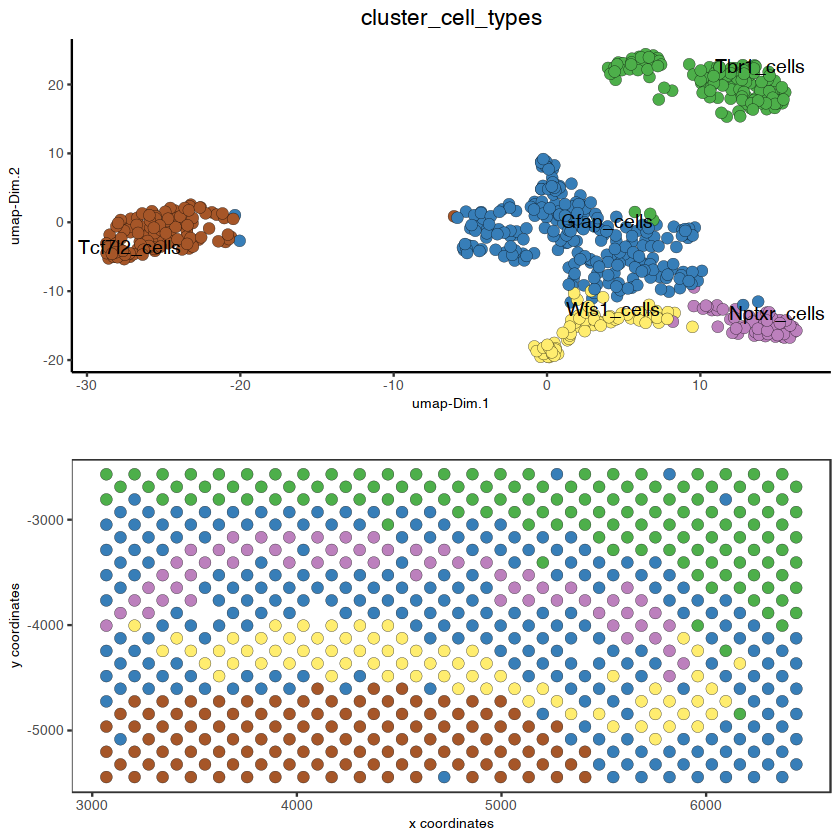

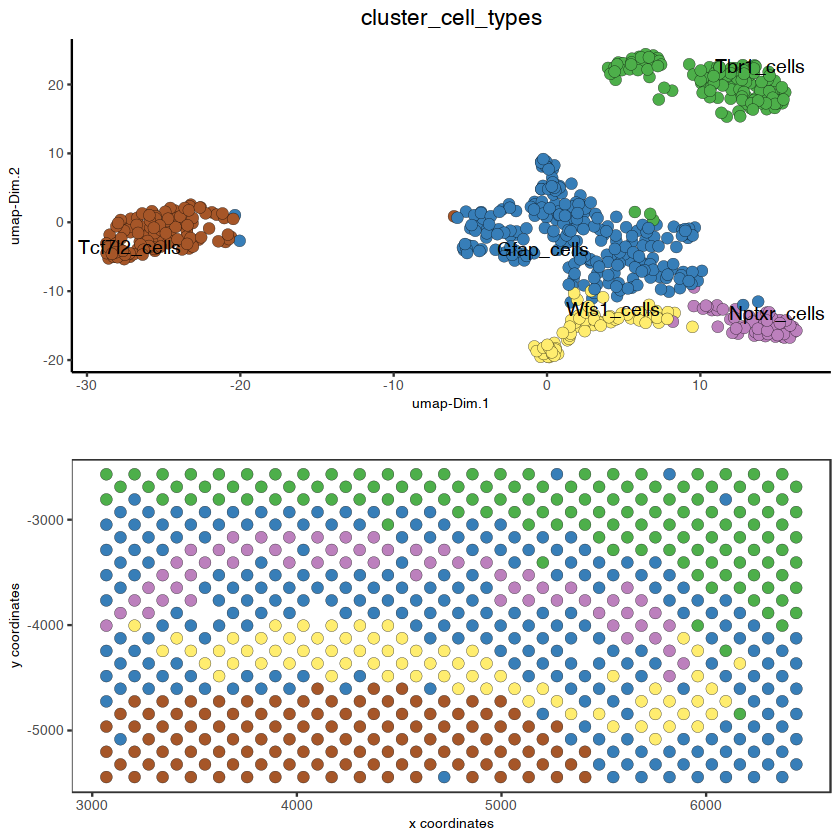

In [11]:

cluster_cell_types = c('Gfap_cells', 'Tbr1_cells', 'Tcf7l2_cells', 'Wfs1_cells', 'Nptxr_cells')
names(cluster_cell_types) = 1:5
my_visium_object = annotateGiotto(gobject = my_visium_object, annotation_vector = cluster_cell_types,
                             cluster_column = 'leiden_clus', name = 'cluster_cell_types')

# check new cell metadata
pDataDT(my_visium_object)

# visualize annotations
spatDimPlot(gobject = my_visium_object, cell_color = 'cluster_cell_types', spat_point_size = 3, dim_point_size = 3)

[1] "Warning, Cholinergic_monoaminergic only has 4 overlapping genes. Will be removed."
[1] "Warning, Ensheathing_satelliteGlia only has 3 overlapping genes. Will be removed."
[1] "Warning, Granule_neurons only has 5 overlapping genes. Will be removed."
[1] "Warning, Immune only has 5 overlapping genes. Will be removed."
[1] "Warning, Medium_spiny_neurons only has 4 overlapping genes. Will be removed."
[1] "Warning, Neuroblasts_1 only has 2 overlapping genes. Will be removed."
[1] "Warning, Neuroblasts_2 only has 1 overlapping genes. Will be removed."
[1] "Warning, Spinal_cord_1 only has 1 overlapping genes. Will be removed."
[1] "Warning, Spinal_cord_2 only has 1 overlapping genes. Will be removed."
These value columns were not found:  Cholinergic_monoaminergic Ensheathing_satelliteGlia Granule_neurons Immune Medium_spiny_neurons Neuroblasts_1 Neuroblasts_2 Spinal_cord_1 Spinal_cord_2

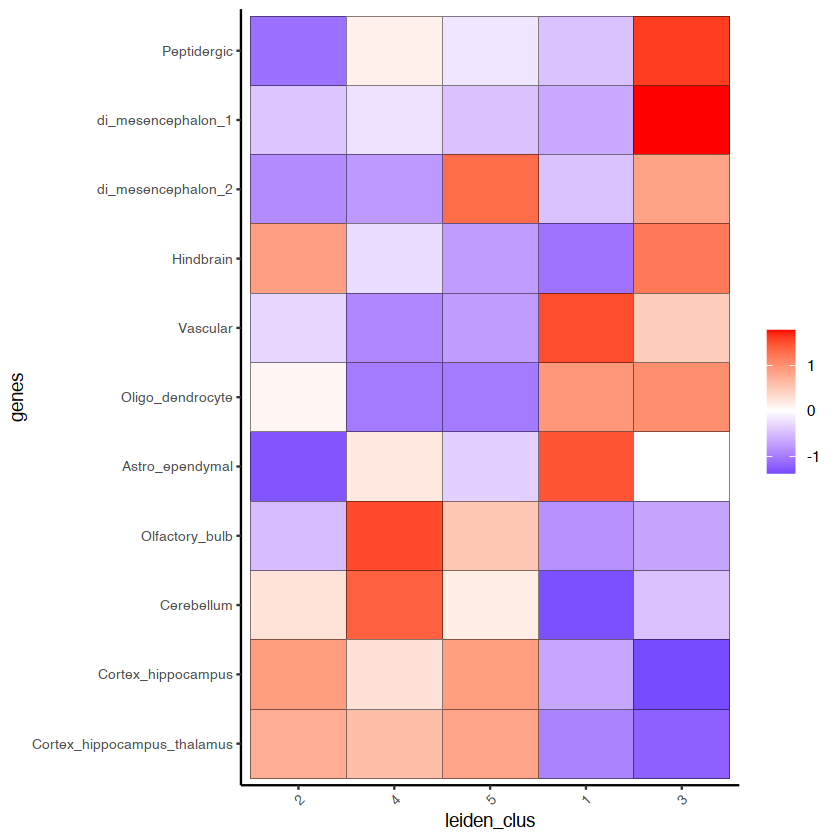

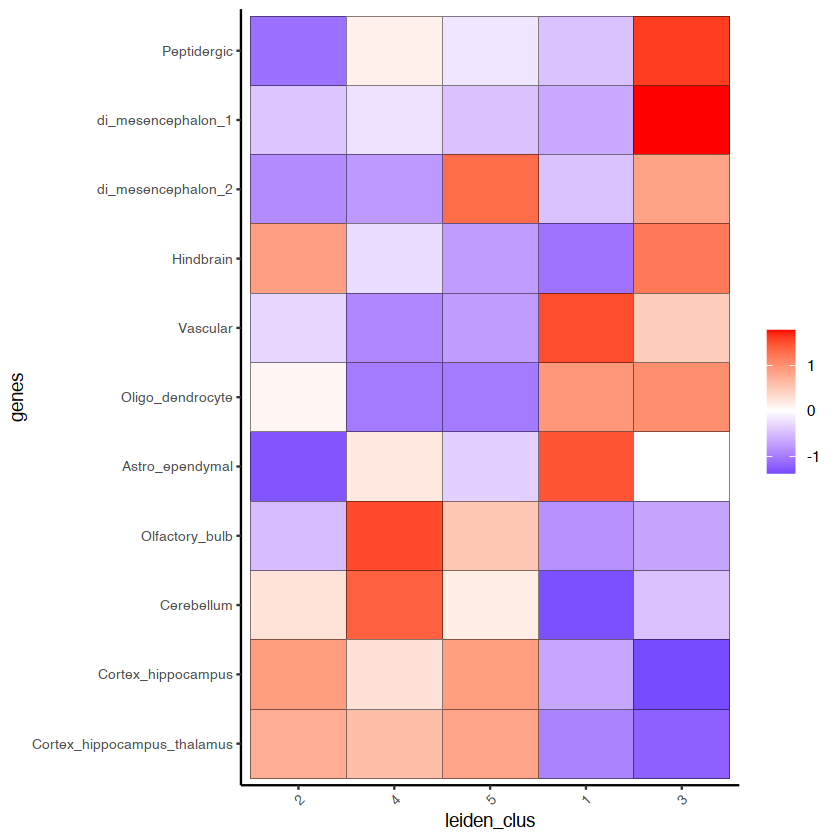

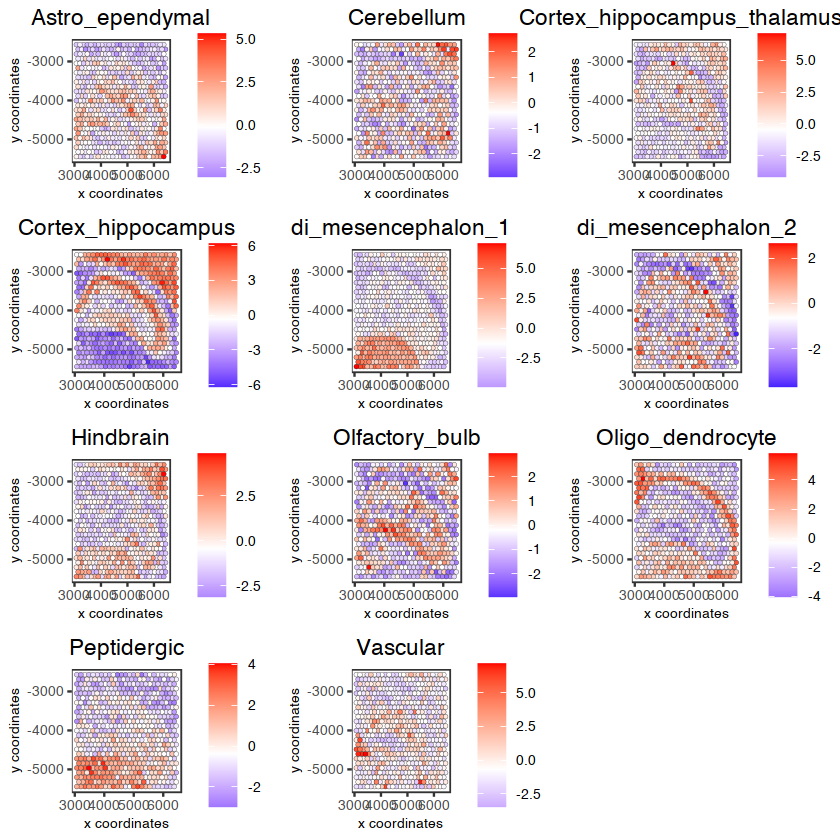

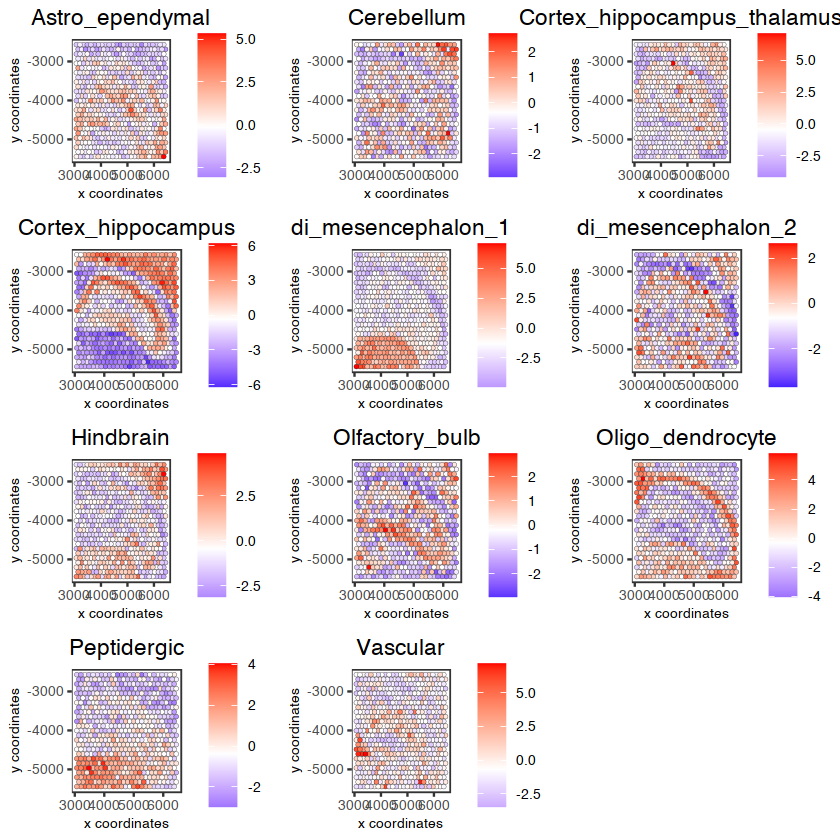

In [12]:
## cell type signatures ##
## combination of all marker genes identified in Zeisel et al
sign_matrix_path = system.file("extdata", "sig_matrix.txt", package = 'Giotto')
brain_sc_markers = data.table::fread(sign_matrix_path) # file don't exist in data folder
sig_matrix = as.matrix(brain_sc_markers[,-1]); rownames(sig_matrix) = brain_sc_markers$Event

## enrichment tests
my_visium_object = runSpatialEnrich(my_visium_object, 
                               sign_matrix = sig_matrix, 
                               enrich_method = 'PAGE') #default = 'PAGE'

## heatmap of enrichment versus annotation (e.g. clustering result)
cell_types = colnames(sig_matrix)
plotMetaDataCellsHeatmap(gobject = my_visium_object,
                         metadata_cols = 'leiden_clus',
                         value_cols = cell_types,
                         spat_enr_names = 'PAGE',
                         x_text_size = 8, y_text_size = 8)


enrichment_results = my_visium_object@spatial_enrichment$PAGE
enrich_cell_types = colnames(enrichment_results)
enrich_cell_types = enrich_cell_types[enrich_cell_types != 'cell_ID']

## spatplot
spatCellPlot(gobject = my_visium_object, spat_enr_names = 'PAGE',
             cell_annotation_values = enrich_cell_types,
             cow_n_col = 3,coord_fix_ratio = NULL, point_size = 1)

In [13]:
pDataDT(my_visium_object)

cell_ID            nr_genes perc_genes total_expr leiden_clus cell_types  
1   AAAGGGATGTAGCAAG-1 226      38.24027    992.0223  1           Gfap_cells  
2   AAATGGCATGTCTTGT-1 283      47.88494   1123.8751  2           Tbr1_cells  
3   AAATGGTCAATGTGCC-1 247      41.79357   1024.8760  3           Tcf7l2_cells
4   AAATTAACGGGTAGCT-1 221      37.39425    971.3199  3           Tcf7l2_cells
5   AACAACTGGTAGTTGC-1 306      51.77665   1157.2925  3           Tcf7l2_cells
6   AACAGGAAATCGAATA-1 337      57.02200   1227.8457  2           Tbr1_cells  
7   AACAGGATGGGCCGCG-1 345      58.37563   1270.2856  3           Tcf7l2_cells
8   AACCATGGGATCGCTA-1 245      41.45516    906.7252  1           Gfap_cells  
9   AACCCAGAGACGGAGA-1 209      35.36379    944.9298  1           Gfap_cells  
10  AACCGAGCTTGGTCAT-1 234      39.59391   1002.0938  1           Gfap_cells  
11  AACCGTTGTGTTTGCT-1 250      42.30118   1020.3441  2           Tbr1_cells  
12  AACGATAGAAGGGCCG-1 262      44.33164    972.3593  1           Gfap_cells  
13  AACGATATGTCAACTG-1 307      51.94585   1091.5112  1           Gfap_cells  
14  AACGCGGTCTCCAGCC-1 340      57.52961   1084.5768  5           Nptxr_cells 
15  AACGTCAGACTAGTGG-1 425      71.91201   1262.9168  4           Wfs1_cells  
16  AACTCGATGGCGCAGT-1 263      44.50085   1052.5321  2           Tbr1_cells  
17  AACTGATATTAGGCCT-1 251      42.47039   1044.1316  2           Tbr1_cells  
18  AACTGGGTCCCGACGT-1 272      46.02369   1065.5888  1           Gfap_cells  
19  AACTTGCCCGTATGCA-1 327      55.32995   1016.3625  1           Gfap_cells  
20  AAGAGATGAATCGGTA-1 397      67.17428   1073.1927  1           Gfap_cells  
21  AAGCTCGTGCCAAGTC-1 194      32.82572    753.4470  1           Gfap_cells  
22  AAGGAGCGGTTGGTGC-1 372      62.94416   1219.8311  3           Tcf7l2_cells
23  AAGGCGCGTAAAGCTT-1 379      64.12860   1149.7145  4           Wfs1_cells  
24  AAGGCTGTGCTCATCG-1 256      43.31641   1066.2885  3           Tcf7l2_cells
25  AAGTAGAAGACCGGGT-1 163      27.58037    808.2545  1           Gfap_cells  
26  AAGTAGTGACGCGAGG-1 261      44.16244   1050.1899  3           Tcf7l2_cells
27  AATCCAAGGGCCTGAG-1 319      53.97631   1172.2522  2           Tbr1_cells  
28  AATGACTGTCAGCCGG-1 220      37.22504    988.9873  4           Wfs1_cells  
29  AATGCAACCGGGTACC-1 248      41.96277   1074.7868  1           Gfap_cells  
30  AATGGTTCTCACAAGC-1 155      26.22673    789.5700  1           Gfap_cells  
⋮   ⋮                  ⋮        ⋮          ⋮          ⋮           ⋮           
593 TTCAAAGTCTCTAGCC-1 368      62.26734    887.5301  1           Gfap_cells  
594 TTCAACGACCCGACCG-1 189      31.97970    890.8466  1           Gfap_cells  
595 TTCAAGCCGAGCTGAG-1 279      47.20812   1098.4488  2           Tbr1_cells  
596 TTCATGGCGCAACAGG-1 298      50.42301   1089.9550  2           Tbr1_cells  
597 TTCCTCGAGGGTGTCT-1 261      44.16244   1052.4269  1           Gfap_cells  
598 TTCGACGGGAAGGGCG-1 402      68.02030   1220.8861  4           Wfs1_cells  
599 TTCGCACTCGCGTGCT-1 386      65.31303   1336.0395  4           Wfs1_cells  
600 TTCGTACTCCAGAACG-1 296      50.08460   1146.6581  3           Tcf7l2_cells
601 TTCTACTTGCGAGGGC-1 152      25.71912    785.7827  1           Gfap_cells  
602 TTCTAGGCCAATTGTG-1 125      21.15059    521.5715  1           Gfap_cells  
603 TTCTTAGTGAACGGTG-1 286      48.39255    941.1895  5           Nptxr_cells 
604 TTCTTAGTGGCTCAGA-1 357      60.40609   1186.1398  1           Gfap_cells  
605 TTCTTGTAACCTAATG-1 103      17.42809    592.8291  1           Gfap_cells  
606 TTGAAGAATTCCCAGG-1 285      48.22335   1108.5016  3           Tcf7l2_cells
607 TTGAATATGGACTTTC-1 371      62.77496    896.1560  1           Gfap_cells  
608 TTGATCTAACTTTGTC-1 271      45.85448    938.2142  3           Tcf7l2_cells
609 TTGATTATGCAGATGA-1 177      29.94924    801.6968  1           Gfap_cells  
610 TTGCACGGAGCAGCAC-1 311      52.62267   1201.7754  5           Nptxr_cells 
611 TTGCTCCCATACCGGA-1 329      55.66836   1079.5777  